## Линейная регрессия

In [1]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
#print(boston.DESCR)

In [3]:
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [5]:
X = boston_df.iloc[:,:-1]
y = boston_df["Price"]

### Train-test split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

Будем масштабировать наши признаки перед обучением модели. 
Для этого воспользуемся трансформером StandardScaler. Трансформеры в sklearn имеют методы fit и transform (а еще fit_transform). Метод fit принимает на вход обучающую выборку и считает по ней необходимые значения (например статистики, как StandardScaler: среднее и стандартное отклонение каждого из признаков). transform применяет преобразование к переданной выборке.

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Линейная регрессия

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [8]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
print("MSE for linear regression: ", mse_lr)

MSE for linear regression:  16.943073013833786


In [9]:
lr.coef_

array([-1.12795125,  1.08053853, -0.3241439 ,  0.84143856, -1.79718378,
        2.4948987 , -0.25980541, -3.10410277,  2.66127768, -1.84404324,
       -1.96016875,  0.94618242, -3.45680626])

### Ridge - регрессия

Чтобы избежать переобучения, модель регуляризуют. Обычно переобучения в линейных моделях связаны с большими весами, а поэтому модель часто штрафуют за большие значения весов, добавляя к функционалу качества, например, квадрат $\ell^2$-нормы вектора $w$:

$$Q_{reg}(X, y, a) = Q(X, y, a) + \lambda \|w\|_2^2$$

Это слагаемое называют $\ell_2$-регуляризатором, а коэффициент $\lambda$ &mdash; коэффициентом регуляризации. 




https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [10]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=10)

rr.fit(X_train, y_train)
y_pred = rr.predict(X_test)
mse_rr = mean_squared_error(y_test, y_pred)
print("MSE for ridge regression on test: ", mse_rr)

MSE for ridge regression on test:  17.482380751056763


За счет масштабирования все признаки будут регуляризоваться в равной степени.

In [11]:
rr.coef_

array([-1.03511612,  0.92157744, -0.4996321 ,  0.87280438, -1.52150898,
        2.56705907, -0.29577943, -2.78172918,  2.02552337, -1.27437973,
       -1.87694774,  0.93055252, -3.3545162 ])

### Кросс-валидация

<img src="https://docs.splunk.com/images/thumb/e/ee/Kfold_cv_diagram.png/1200px-Kfold_cv_diagram.png" width=40%>

При кросс-валидации мы делим обучающую выборку на  𝑛  частей (fold). Затем мы обучаем  𝑛  моделей: каждая модель обучается при отсутствии соответствующего фолда, то есть  𝑖 -ая модель обучается на всей обучающей выборке, кроме объектов, которые попали в  𝑖 -ый фолд (out-of-fold). Затем мы измеряем качество  𝑖 -ой модели на  𝑖 -ом фолде. Так как он не участвовал в обучении этой модели, мы получим "честный результат". После этого, для получения финального значения метрики качества, мы можем усреднить полученные нами  𝑛  значений.

применим класс sklearn.model_selection.cross_val_score

In [12]:
from sklearn.model_selection import cross_val_score
model = Ridge(alpha=10)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -28.7176
	-29.0494
	-28.2749
	-25.4925
	-23.3910
Mean CV MSE = 26.9851


### GridSearchCV
 - param_grid : сетка параметров модели, по которой метод находит комбинацию с наибольшим scoring
 - scoring: метрика, по которой считается качество модели на каждом отложенном фолде
 - cv : число блоков кросс-валидации, по которым усредняется значения скореров

In [13]:
import sklearn as skl
sorted(skl.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [14]:
from sklearn.model_selection import GridSearchCV

grid = [0.001, 0.01, 0.1, 1, 10, 100]
gs_rr = GridSearchCV(Ridge(), cv=5, param_grid={"alpha": grid}, scoring="neg_mean_squared_error", n_jobs=-1)
gs_rr.fit(X_train, y_train)
mean_test_score_rr = gs_rr.cv_results_["mean_test_score"]

In [15]:
rr_best = gs_rr.best_estimator_.coef_
rr_best

array([-1.11664647,  1.06045464, -0.34946181,  0.84563065, -1.76422612,
        2.50431667, -0.26470813, -3.06791347,  2.57767615, -1.76536108,
       -1.95057806,  0.94445351, -3.44606075])

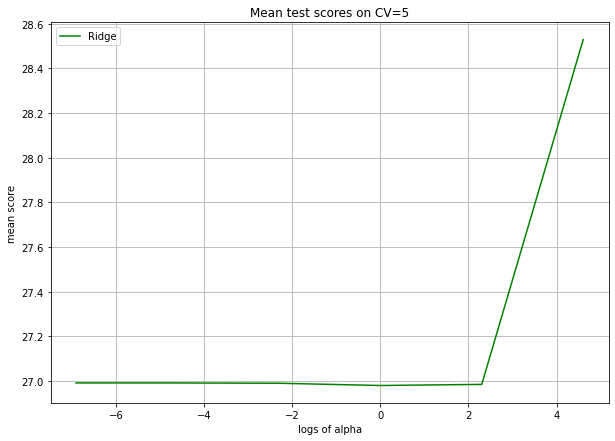

In [16]:
plt.figure(figsize=(10,7))
plt.grid()
plt.title("Mean test scores on CV=5")
plt.plot(np.log(grid), -mean_test_score_rr, color = "green", label = "Ridge")
plt.xlabel("logs of alpha")
plt.ylabel("mean score")
plt.legend()
plt.show()

Наименьшая ошибка - без регуляризации

### Lasso регрессия

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [17]:
from sklearn.linear_model import Lasso

lsr = Lasso(alpha=1)

lsr.fit(X_train, y_train)
y_pred = lsr.predict(X_test)
mse_lsr = mean_squared_error(y_test, y_pred)
print("MSE for lasso regression on test: ", mse_lsr)

MSE for lasso regression on test:  23.16841376407784


In [18]:
lsr.coef_

array([-0.        ,  0.        , -0.        ,  0.18712419, -0.        ,
        2.50898503, -0.        , -0.        , -0.        , -0.        ,
       -1.27874644,  0.23848584, -3.62907371])

In [19]:
from sklearn.model_selection import GridSearchCV

grid = [0.001, 0.01, 0.1, 1, 10, 100]
gs_lsr = GridSearchCV(Lasso(), cv=5, param_grid={"alpha": grid}, scoring="neg_mean_squared_error")
gs_lsr.fit(X_train, y_train)
mean_test_score_lsr = gs_lsr.cv_results_["mean_test_score"]

In [20]:
y_pred = gs_lsr.predict(X_test)
mse_lsr = mean_squared_error(y_test, y_pred)
print("MSE for lasso regression on test: ", mse_lsr)
lsr_best = gs_lsr.best_estimator_.coef_
lsr_best

MSE for lasso regression on test:  16.942193049002416


array([-1.12502104,  1.07671741, -0.32601022,  0.84120705, -1.79236973,
        2.49612469, -0.25815769, -3.09646191,  2.64622737, -1.83096007,
       -1.95877805,  0.94504422, -3.45782253])

MSE меньше, но веса больше, нет зануленных за счет более слабой регуляризации

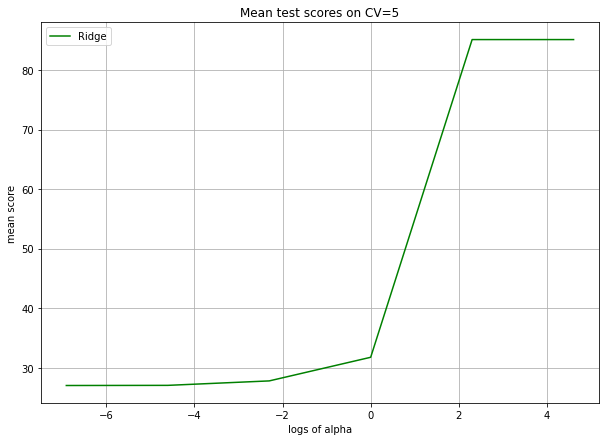

In [21]:
plt.figure(figsize=(10,7))
plt.grid()
plt.title("Mean test scores on CV=5")
plt.plot(np.log(grid), -mean_test_score_lsr, color = "green", label = "Ridge")
plt.xlabel("logs of alpha")
plt.ylabel("mean score")
plt.legend()
plt.show()

 trade-off: более стабильные веса vs ошибка

Регрессия Хубера: меньше переобучается на выбросах, чем Ridge, за счет функции потерь. Класс HuberRegressor в sklearn.


In [24]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV,HuberRegressor,ElasticNetCV
huber= HuberRegressor(epsilon=2.5,alpha=100,max_iter=600)

parameteres = {'epsilon':[1.5,2,2.5,3,3.5,4], 'alpha':[10,100,1000]}

grid_huber = GridSearchCV(huber, param_grid=parameteres, cv=5,scoring='neg_mean_squared_error')


model = grid_huber.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model.best_params_)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))

{'alpha': 10, 'epsilon': 4}
Test MSE = 19.2799
Test MAE = 3.0162


#### Вычислим для  обучающей выборки вектор квадратичных ошибок  прогнозов для каждого объекта , отобразим на графике их распределение. 

#### Выбросим из обучающей выборки все наблюдения с ошибкой >= 97% квантили распределения ошибок 

404

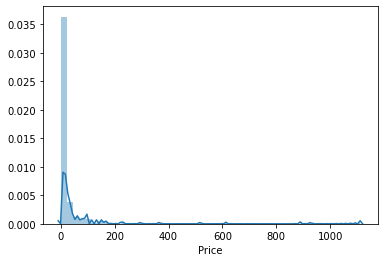

In [30]:
import seaborn as sns
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)
mask = (error < np.quantile(error, 0.97))
X_train.shape[0]

ElasticNet минимизирует:

1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

In [34]:

alphas=np.logspace(-3,3,50)
model = ElasticNetCV(l1_ratio=[0.05,0.1,0.2,0.3,0.5,0.8],alphas=alphas,cv=5)

model.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Best l1 ratio = %.4f" % model.l1_ratio_)
print(" Best alpha = %.4f" % model.alpha_)


Test MSE = 19.8027
Test MAE = 2.9635
Best l1 ratio = 0.0500
 Best alpha = 0.0168
